In [2]:
"""
SIX effectors post infection expression levels
Transcript_Gene	axenic	day1	day2	day3	day7
"""
SIX = """
FOXG_14223	0.4829907217	157.6342857	458.5561605	971.4843895	2630.454711
FOXG_14246	0.01533958343	28.45068853	74.58229807	193.2390398	623.7071944
FOXG_16416	0	121.2472663	331.9685821	427.1183884	1529.575335
FOXG_16398	4.785620332	444.5916574	2609.238104	8091.781015	26121.06488
FOXG_16418	1.393015906	1566.025456	5800.489884	13955.71613	56101.69797
FOXG_17457	0.0310449851	24.63290105	112.7408954	302.4147878	946.80007
FOXG_22493	3.443110868	450.6803895	2086.233268	7108.509998	19036.91093
"""
SIX = {row.split("\t")[0]: list(map(float, row.strip().split("\t")[1:])) for row in SIX.strip().split("\n")}


"""
Apoplastic effectors post infection expression levels
Transcript_Gene	axenic	day1	day2	day3	day7
"""
APO = """
FOXG_00928	131.297967	8745.411564	7138.769999	10247.83831	8773.856657
FOXG_07464	3.21211561	644.2749319	401.3858346	396.1710112	1177.932559
FOXG_14489	0	39.20454077	82.54350783	52.98730977	153.7375463
FOXG_13032	0.09113254187	138.668788	202.0393791	217.9808744	48.06282976
FOXG_13638	0.4117093672	75.08574847	205.3339748	78.60675514	113.9898152
FOXG_02233	992.8482771	91.41685265	70.04546481	138.6097717	179.9239683
FOXG_10275	2304.979863	160.1106439	336.1229145	483.8619205	407.4448212
FOXG_15430	1006.332005	182.4189012	354.6372584	231.477178	215.1021056
"""
APO = {row.split("\t")[0]: list(map(float, row.strip().split("\t")[1:])) for row in APO.strip().split("\n")}

"""
Other/Important Effectors post infection expression levels
Transcript_Gene	axenic	day1	day2	day3	day7
"""
OTHER = """
FOXG_01145	1.590783883	17.69083912	155.6361714	423.7865277	377.0985837
FOXG_08211	30.33442274	712.8409419	543.6497056	301.8488651	208.6058993
FOXG_09801	0.2727788964	110.4454659	248.5678914	187.6117142	49.41633307
FOXG_11583	12.97341829	1246.325934	1389.57478	554.6194597	823.6387161
FOXG_12855	76.25230385	78.19001253	87.44045851	121.8247429	133.3811606
FOXG_16612	0.1058703495	84.18588397	249.0165759	747.086308	236.8189656
FOXG_16902	0.04525823724	4.749213625	44.97536371	46.73658403	35.90122873
"""
OTHER = {row.split("\t")[0]: list(map(float, row.strip().split("\t")[1:])) for row in OTHER.strip().split("\n")}

GENES = {**OTHER, **APO, **SIX}
#print(GENES)

22


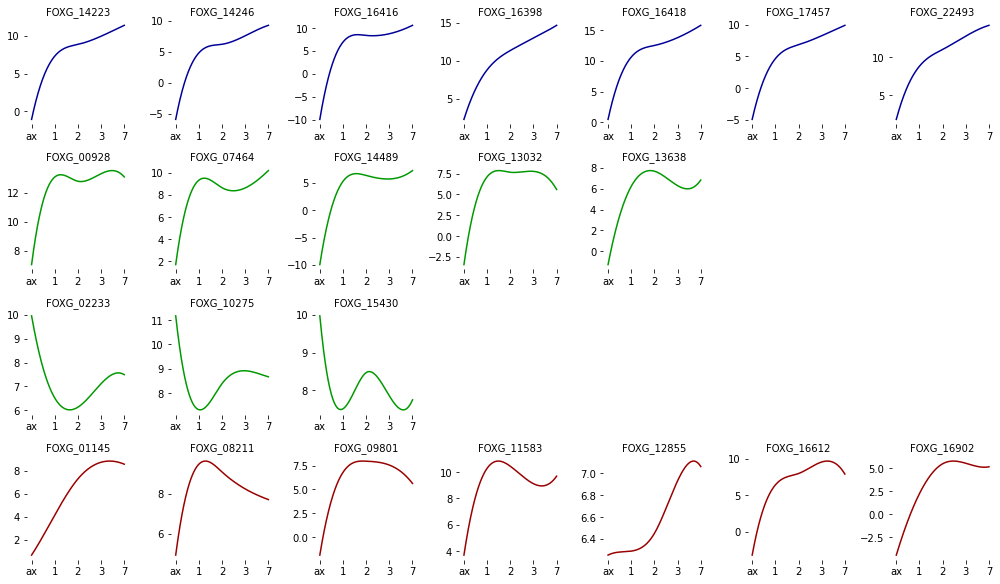

In [3]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline


genes = list()
genes.extend(SIX.items())
genes.extend(APO.items())
genes.extend(OTHER.items())


fig = plt.figure(figsize=(14, 10))


print(len(genes))
other_offset = 0

LOGARITHMIC = True
if LOGARITHMIC:
    ylim = [-10, 15]

for i, (gid, counts) in enumerate(genes, start=1):
    
    if gid in OTHER:
        other_offset = 6        
        color = "#990000"
    elif gid in SIX:
        color = "#000099"
    elif gid in APO:
        if gid in {"FOXG_02233", "FOXG_10275", "FOXG_15430"}:
            other_offset = 2
        color = "#009900"

        
    splt = fig.add_subplot(5, 7, i + other_offset)

    ticklabels = ['axenic', '1dpi', '2dpi', '3dpi', '7dpi']
    #splt.plot(ticklabels, 
    #          #counts, label=gid)
    #          [math.log(c + 0.001, 2) for c in counts], c=color, label=gid)
    
    y = [math.log(c + 0.001, 2) for c in counts]
    # y = counts
        
    xnew = np.linspace(0, 4, 300)
    spl = make_interp_spline(range(5), y, k=3)  # type: BSpline
    y_smooth = spl(xnew)

    #xx = list(range(0, 300, 60))
    #yy = spl(xx)
    #splt.plot(xx, yy, c=color, marker='|', linestyle=None)
    splt.plot(xnew, y_smooth, c=color, label=gid) #, marker='x')
    #splt.plot(range(0, 300, 60), spl(range(0, 300, 60)), c=color, marker='x', lw=0)
    #splt.plot(range(5), y, lw=1)
    
    
    splt.set_title(gid, fontsize=10)
    #fig.suptitle('test title', fontsize=20)
    splt.spines["top"].set_visible(False)
    splt.spines["left"].set_visible(False)
    splt.spines["right"].set_visible(False)
    splt.spines["bottom"].set_visible(False)
    #splt.yaxis.set_visible(False)
    #splt.xaxis.set_visible(False)
    #splt.set_xticks(np.linspace(0, 300, num=5))
    splt.set_xticks(range(5))
    ticklabels = ["ax", "1", "2", "3", "7"]
    splt.set_xticklabels(ticklabels) #map(str, [0, 1, 2, 3, 7]))
    #splt.set_ylim([-10, 15])
    #splt.set_ylim(ylim)
    #splt.set_ylim([0, 10000])
    
    #splt.legend()
    fig.tight_layout()


plt.savefig("/Users/cschu/Documents/amey/foxy/effector_waves_log.pdf", dpi=300, format="pdf")





In [43]:

print(*list(range(0,300,60)))
def plot_expression_curves(genes, title, short_title):
    fig = plt.figure(figsize=(12, 10))
    #splt = fig.add_subplot(1,1,1)
    
    for i, (gid, counts) in enumerate(genes.items(), start=1):
        
        y = [math.log(c + 0.001, 2) for c in counts]
        
        # 300 represents number of points to make between T.min and T.max
        xnew = np.linspace(0, 4, 300)
        spl = make_interp_spline(range(5), y, k=3)  # type: BSpline
        y_smooth = spl(xnew)

        splt.plot(xnew, y_smooth)
        #plt.show()
        splt.plot(range(5), y)
        
        #splt.plot(['axenic', '1dpi', '2dpi', '3dpi', '7dpi'],
        #         [math.log(c + 0.001, 2) for c in counts], label=gid)
        splt.legend()
        splt.set_title(title)
        splt.set_ylabel("log2 expression")
    
    #plt.savefig("/Users/cschu/Documents/amey/foxy/{}_expression_curves.pdf".format(short_title,
    #                                                                               dpi=300, format="pdf"))
    
    
#plot_expression_curves(SIX, "SIX effectors post infection expression levels", "SIX")
#plot_expression_curves(APO, "Apoplastic effectors post infection expression levels", "APO")
#plot_expression_curves(OTHER, "Other effectors post infection expression levels", "OTHER")

#



0 60 120 180 240


In [83]:
list(range(0,300,60))
#help(np.linspace)
help(splt.set_xticks)
np.linspace(0, 300, num=5)

Help on method set_xticks in module matplotlib.axes._base:

set_xticks(ticks, *, minor=False) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the xaxis' tick locations.
    
    Parameters
    ----------
    ticks : list of floats
        List of tick locations.
    minor : bool, default: False
        If ``False``, set the major ticks; if ``True``, the minor ticks.



array([  0.,  75., 150., 225., 300.])